In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Set the path for your training images
train_dir = 'C:/Users/DELL/Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

In [3]:
# Create an ImageDataGenerator instance with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Load validation data
val_generator = datagen.flow_from_directory(
    train_dir,  # Use the same directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [4]:
# Load the pretrained VGG16 model without the top layer
base_model = VGG16(input_shape=(224, 224, 3),  # Specify input shape
                   include_top=False,
                   weights='imagenet')        # Load pretrained weights on ImageNet

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')
])

optmizer = Adam(learning_rate= 0.0001)

# Compile the model
model.compile(optimizer=optmizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,513 (56.39 MB)

 Trainable params: 66,825 (261.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
# Train the model for 20 epochs
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=val_generator.samples // 32
)

Epoch 1/20


C:\Users\DELL\Desktop\tenflo\my_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.1074 - loss: 2.5567 - val_accuracy: 0.1418 - val_loss: 2.1736
Epoch 2/20
 1/56 ━━━━━━━━━━━━━━━━━━━━ 2:47 3s/step - accuracy: 0.2188 - loss: 2.3367

C:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.2188 - loss: 2.3367 - val_accuracy: 0.1429 - val_loss: 2.1771
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.1441 - loss: 2.2963 - val_accuracy: 0.1274 - val_loss: 2.0654
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2188 - loss: 2.2344 - val_accuracy: 0.0714 - val_loss: 1.9781
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.1687 - loss: 2.1893 - val_accuracy: 0.2067 - val_loss: 2.0109
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.0938 - loss: 2.1131 - val_accuracy: 0.2857 - val_loss: 2.0885
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 233s 4s/step - accuracy: 0.1837 - loss: 2.1279 - val_accuracy: 0.2620 - val_loss: 1.9910
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.2812 - loss: 2.0747 - val_accuracy: 0.2857 - val_loss: 2.1289
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 301s 5s/step - accuracy: 0.1996 - loss: 2.1106 - val_accuracy: 0.2620 - val_loss: 1.

In [6]:
# Unfreeze specific layers for fine-tuning
for layer in base_model.layers[:50]:  # Optionally, fine-tune from layer 50 onward
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model for an additional 10 epochs
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=val_generator.samples // 32
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1130s 20s/step - accuracy: 0.2610 - loss: 1.9808 - val_accuracy: 0.3654 - val_loss: 1.7367
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.2500 - loss: 1.7296 - val_accuracy: 0.3571 - val_loss: 1.8331
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1161s 21s/step - accuracy: 0.3932 - loss: 1.7366 - val_accuracy: 0.4303 - val_loss: 1.6417
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.4062 - loss: 1.6152 - val_accuracy: 0.5000 - val_loss: 1.6150
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1191s 21s/step - accuracy: 0.4808 - loss: 1.5366 - val_accuracy: 0.4543 - val_loss: 1.5306
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.6250 - loss: 1.2493 - val_accuracy: 0.3571 - val_loss: 1.4609
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1054s 19s/step - accuracy: 0.4912 - loss: 1.4268 - val_accuracy: 0.4591 - val_loss: 1.5327
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.4062 - loss: 1.5883 - val_accuracy

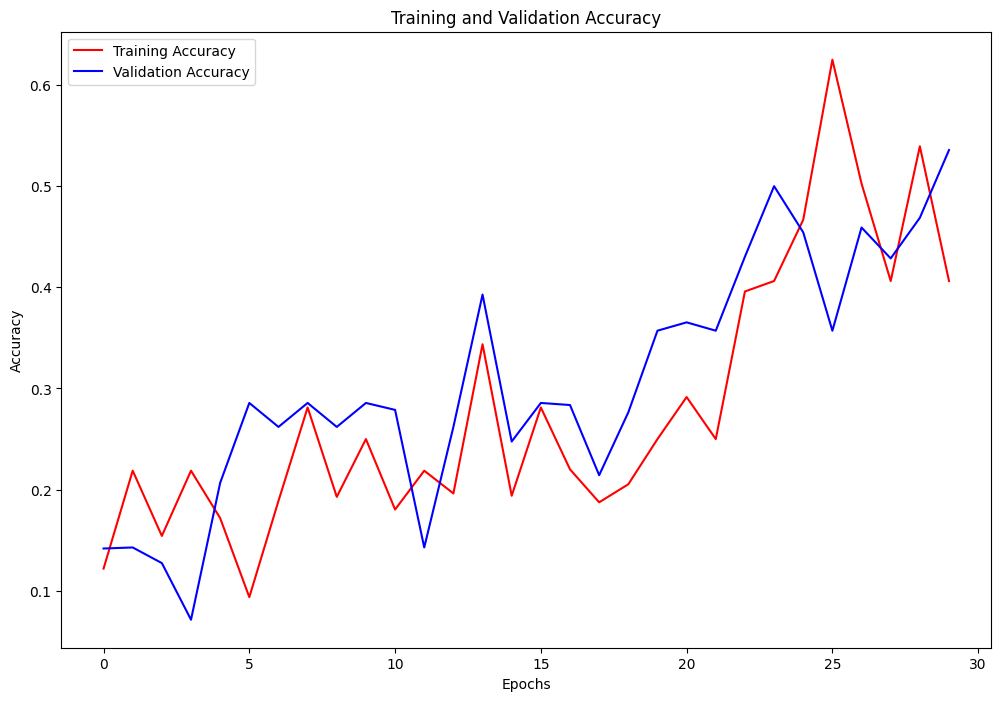

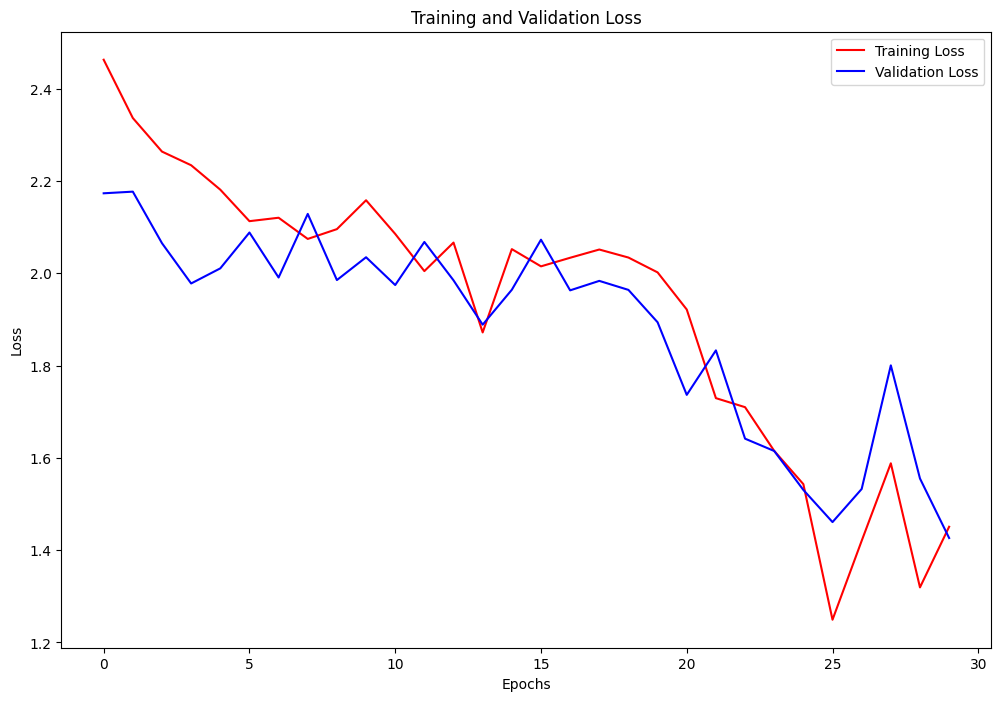

In [7]:
# Plot accuracy and loss over epochs
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Prepare test data generator (if you have a test dataset)
test_dir = 'C:/Users/DELL/Downloads/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

# Prepare test data generator
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')

Found 118 images belonging to 9 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3559 - loss: 1.9652
Test Accuracy: 0.3559
